#### First let's get some public data

In [11]:
import numpy as np
import pandas_datareader.data as web
import benford as ben
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01')

In [17]:
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.455368
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.657753
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.718437
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,29.022047
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,29.143478


#### Now let's add some returns information

In [23]:
#adding _ to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1         #simple percentage returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-05-05,205.559998,205.979996,204.470001,204.970001,65635100,204.970001,-0.000195,-0.000195
2016-05-06,204.059998,205.770004,203.880005,205.720001,83784900,205.720001,0.003659,0.003652
2016-05-09,205.570007,206.399994,205.360001,205.889999,68187900,205.889999,0.000826,0.000826
2016-05-10,206.720001,208.470001,206.639999,208.449997,74236100,208.449997,0.012434,0.012357
2016-05-11,207.910004,208.539993,206.500000,206.500000,77749700,206.500000,-0.009355,-0.009399


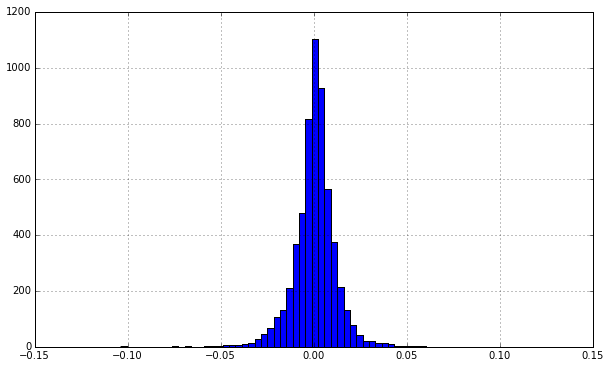

In [24]:
sp.l_r.hist(bins=70, figsize=(10,6))